Importing the Dependencies

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Collection & Processing

In [188]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('data/titanic.csv')

In [189]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [191]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Create new features FROM the existing ones

In [192]:
# 1. Extract 'Title' from 'Name'
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
/tmp/ipykernel_6765/3547808665.py:2: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
  titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/tmp/ipykernel_6765/3547808665.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values wil

In [193]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [194]:
# Check the titles
print(titanic_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


In [195]:
# Group rare titles into 'Other'
titanic_data['Title'] = titanic_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Sir', 'Capt', 'Don', 'Jonkheer', 'Countess', 'Dona', 'Mlle', 'Mme', 'Ms'], 'Other')

/tmp/ipykernel_6765/1874067642.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_data['Title'] = titanic_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Sir', 'Capt', 'Don', 'Jonkheer', 'Countess', 'Dona', 'Mlle', 'Mme

In [196]:
# Unique titles after grouping:")
print(titanic_data['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64


Create 'FamilySize' and 'IsAlone'

In [197]:
# Combine 'SibSp' (Siblings/Spouse) and 'Parch' (Parents/Children)
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1 # +1 for the passenger themselves

# Create a binary feature for whether the passenger is alone
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'IsAlone'] = 1

/tmp/ipykernel_6765/341200760.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1 # +1 for the passenger themselves
/tmp/ipykernel_6765/341200760.py:5: FutureWarn

Create 'HasCabin'

In [198]:
titanic_data['HasCabin'] = titanic_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

/tmp/ipykernel_6765/1895402290.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_data['HasCabin'] = titanic_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)


Handle Skewed 'Fare' data

In [199]:
titanic_data['Fare'] = titanic_data['Fare'].apply(lambda x: np.log1p(x))

/tmp/ipykernel_6765/3564125179.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_data['Fare'] = titanic_data['Fare'].apply(lambda x: np.log1p(x))


In [200]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
IsAlone          0
HasCabin         0
dtype: int64

Handling the Missing values

In [201]:
# Drop the original columns we don't need anymore
features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
titanic_data = titanic_data.drop(columns=features_to_drop, axis=1)

In [202]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [203]:
print(titanic_data['Embarked'].mode()[0])

S


In [204]:
# check the number of missing values in each column
titanic_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
Title           0
FamilySize      0
IsAlone         0
HasCabin        0
dtype: int64

Data Analysis

In [205]:
# getting some statistical measures about the data
titanic_data.describe()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,HasCabin
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,2.962246,1.904602,0.602694,0.228956
std,0.486592,0.836071,14.526497,0.969048,1.613459,0.489615,0.420397
min,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,2.187218,1.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,2.737881,1.000000,1.000000,0.000000
75%,1.000000,3.000000,38.000000,3.465736,2.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,6.240917,11.000000,1.000000,1.000000


In [206]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Visualization

In [207]:
sns.set()

/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/categorical.py:1292: FutureW

<Axes: xlabel='Survived', ylabel='count'>

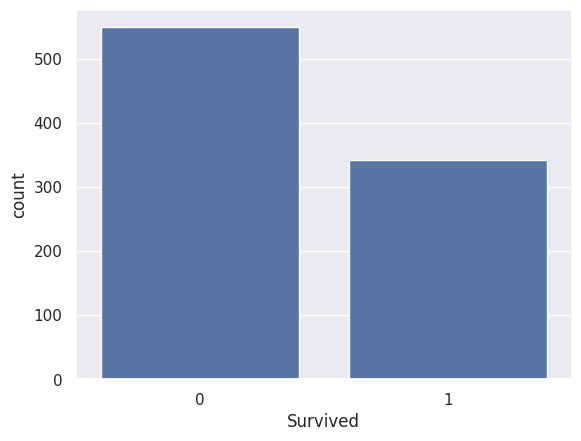

In [208]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [209]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/categorical.py:1292: FutureW

<Axes: xlabel='Sex', ylabel='count'>

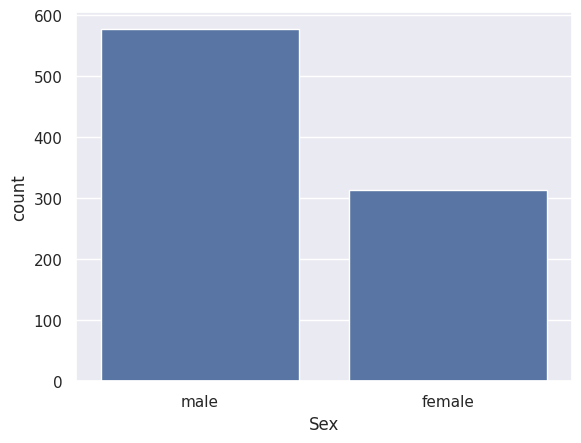

In [210]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/categorical.py:403: FutureWa

<Axes: xlabel='Sex', ylabel='count'>

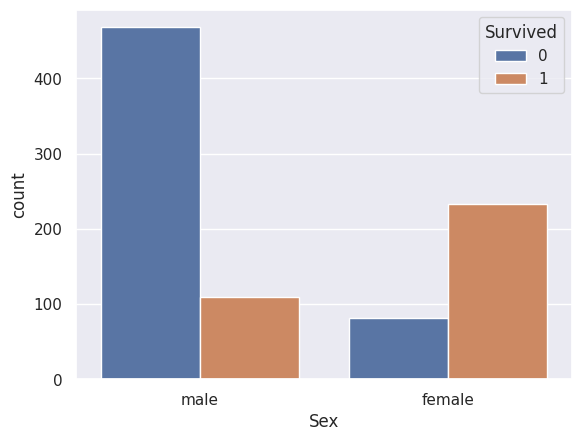

In [211]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/categorical.py:1292: FutureW

<Axes: xlabel='Pclass', ylabel='count'>

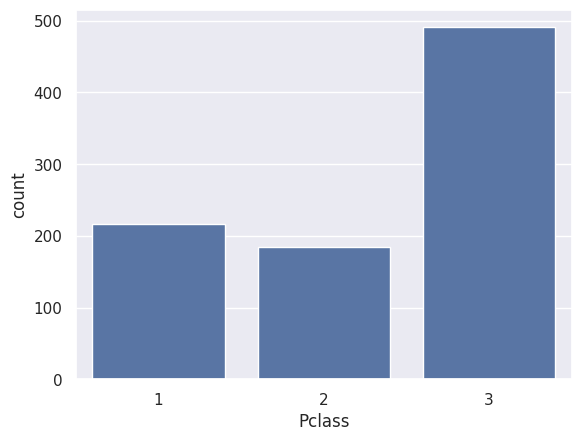

In [212]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/_base.py:1447: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.plot_data[axis] = cat_data
/home/nandanv76/.local/lib/python3.14/site-packages/seaborn/categorical.py:403: FutureWa

<Axes: xlabel='Pclass', ylabel='count'>

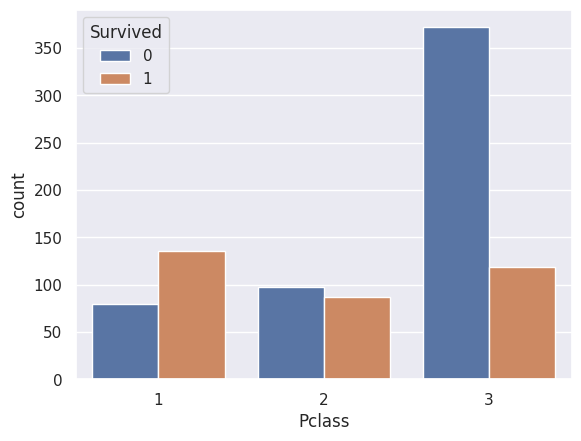

In [213]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

Encoding the Categorical Columns

In [214]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [215]:
titanic_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [216]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,HasCabin
0,0,3,male,22.0,2.110213,S,Mr,2,0,0
1,1,1,female,38.0,4.280593,C,Mrs,2,0,1
2,1,3,female,26.0,2.188856,S,Miss,1,1,0
3,1,1,female,35.0,3.990834,S,Mrs,2,0,1
4,0,3,male,35.0,2.202765,S,Mr,1,1,0


Separating features & Target

In [217]:
X = titanic_data.drop(columns = ['Survived'], axis=1)
Y = titanic_data['Survived']

In [218]:
print(X)

     Pclass     Sex   Age      Fare Embarked  Title  FamilySize  IsAlone  \
0         3    male  22.0  2.110213        S     Mr           2        0   
1         1  female  38.0  4.280593        C    Mrs           2        0   
2         3  female  26.0  2.188856        S   Miss           1        1   
3         1  female  35.0  3.990834        S    Mrs           2        0   
4         3    male  35.0  2.202765        S     Mr           1        1   
..      ...     ...   ...       ...      ...    ...         ...      ...   
886       2    male  27.0  2.639057        S  Other           1        1   
887       1  female  19.0  3.433987        S   Miss           1        1   
888       3  female   NaN  3.196630        S   Miss           4        0   
889       1    male  26.0  3.433987        C     Mr           1        1   
890       3    male  32.0  2.169054        Q     Mr           1        1   

     HasCabin  
0           0  
1           1  
2           0  
3           1  
4      

In [219]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data & Test data

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [221]:
print(X.shape, X_train.shape, X_test.shape)

(891, 9) (712, 9) (179, 9)


Define numeric and Categorical

In [222]:
numeric_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Embarked', 'Sex', 'Pclass', 'Title', 'IsAlone', 'HasCabin']

Processing pipeline for numeric data

In [223]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Processing pipeline for categorical data

In [224]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Bundle two pipelines

In [225]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Model Training

Model 1: Logistic Regression

In [226]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

In [227]:
# training the Logistic Regression model with training data
lr_pipeline.fit(X_train, Y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model Evaluation

Accuracy Score

In [228]:
# accuracy on training data
lr_train_prediction = lr_pipeline.predict(X_train)

In [229]:
print(lr_train_prediction)

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [230]:
# accuracy on test data
lr_test_prediction = lr_pipeline.predict(X_test)

In [231]:
print(lr_test_prediction)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [232]:
lr_training_data_accuracy = accuracy_score(Y_train, lr_train_prediction)
print('Accuracy score of training data : ', lr_training_data_accuracy)
lr_test_data_accuracy = accuracy_score(Y_test, lr_test_prediction)
print('Accuracy score of test data : ', lr_test_data_accuracy)

print("\nLogistic Regression Classification Report:")
print(classification_report(Y_test, lr_test_prediction))

Accuracy score of training data :  0.8455056179775281
Accuracy score of test data :  0.8268156424581006

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Model 2: Random Forest

In [233]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

Train the model

In [234]:
rf_pipeline.fit(X_train, Y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Predictions and accuracy on training and testing data

In [235]:
rf_train_prediction = rf_pipeline.predict(X_train)
rf_test_prediction = rf_pipeline.predict(X_test)

In [236]:
rf_training_data_accuracy = accuracy_score(Y_train, rf_train_prediction)
print('Accuracy score of training data : ', rf_training_data_accuracy)
rf_test_data_accuracy = accuracy_score(Y_test, rf_test_prediction)
print('Accuracy score of test data : ', rf_test_data_accuracy)

print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, rf_test_prediction))

Accuracy score of training data :  0.9845505617977528
Accuracy score of test data :  0.8324022346368715

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



Model 3: Gradient Boosting

In [237]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

Train the model

In [238]:
gb_pipeline.fit(X_train, Y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Predictions and accuracy on training and testing data

In [239]:
gb_train_prediction = gb_pipeline.predict(X_train)
gb_test_prediction = gb_pipeline.predict(X_test)

In [240]:
gb_training_data_accuracy = accuracy_score(Y_train, gb_train_prediction)
print('Accuracy score of training data : ', gb_training_data_accuracy)
gb_test_data_accuracy = accuracy_score(Y_test, gb_test_prediction)
print('Accuracy score of test data : ', gb_test_data_accuracy)

print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, gb_test_prediction))

Accuracy score of training data :  0.9087078651685393
Accuracy score of test data :  0.8379888268156425

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [241]:
best_model_pipeline = gb_pipeline

Predict on new data

In [242]:
new_passenger_data = pd.DataFrame({
    'Pclass': [3],               # 3rd Class
    'Sex': ['male'],             # String 'male'
    'Age': [25.0],               # A float
    'Fare': [7.25],              # The original fare, NOT log-transformed
    'Embarked': ['S'],           # String 'S'
    'Title': ['Mr'],             # String 'Mr'
    'FamilySize': [1],           # 1 (FamilySize = 0 SibSp + 0 Parch + 1)
    'IsAlone': [1],              # 1 (because FamilySize is 1)
    'HasCabin': [0]              # 0 (no cabin)
})

# 3. Use the .predict() method of the FULL pipeline
prediction = best_model_pipeline.predict(new_passenger_data)

# 4. Print the result
if prediction[0] == 1:
    print("Prediction: The new passenger is LIKELY TO SURVIVE.")
else:
    print("Prediction: The new passenger is LIKELY TO NOT SURVIVE.")

Prediction: The new passenger is LIKELY TO NOT SURVIVE.
